<a href="https://colab.research.google.com/github/sokhan1/PYTHON/blob/main/ANN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Neuron Network

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
print(tf.__version__)

2.17.0


In [2]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1],]

y_data = [[0],
          [1],
          [1],
          [0],
]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(4, 2) (4, 1)


In [3]:
# Define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
#model build => hypothesis
model = Sequential()
model.add(Dense(2, activation = "sigmoid", input_dim=2)) #neuron=2
model.add(Dense(1, activation="sigmoid"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
#train = > cost_function, metric, optimizer

model.compile(optimizer= "SGD",
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_data, y_data, epochs=1000, batch_size=32, verbose=0)

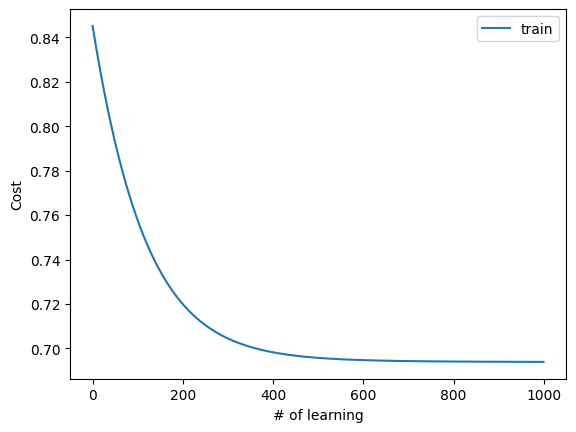

In [7]:
#Visualization

pyplot.plot(history.history['loss'], label='train')
pyplot.xlabel("# of learning")
pyplot.ylabel("Cost")
pyplot.legend()
pyplot.show()

In [8]:
# Evaluation & Predict
loss, train_acc = model.evaluate(x_data, y_data, verbose=0)
print(f"train_acc= {train_acc}")
print(f"loss={loss}")
predict = model.predict(x_data)
print(predict)

train_acc= 0.5
loss=0.6938880681991577
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[0.4694864 ]
 [0.48234636]
 [0.523739  ]
 [0.53503263]]
